In [30]:
import numpy as np
from pak.plotfunc import *
from pak.function_old import *

# 创建测试套件并获取问题实例
dim = 4 ###########################################################注意维度
scale = 'M' #######################################################噪声大小

bounds = [(-5., 5.), ] * dim 
f = [F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24]
mindata = [79.48,66.95,77.66,77.66,66.71,65.87,92.94,98.62,65.61,59.13,76.27,56.61,
           68.42,77.31,70.03,71.35,69.83,119.54,71.69,71.29,124.08,51.57,85.39,93.30]

n_repeats = 30
n_calls = 400 #####################################################迭代次数
n_init = 40 #######################################################初始点数


In [31]:
title = 22
csvlist = ["Fn"+str(title)+scale,"Fn"+str(title)+scale+'_random',"Fn"+str(title)+scale+'_noi',"Fn"+str(title)+scale+'_obs',"Fn"+str(title)+scale+'_pre'] 
func_val = []
res = []
true_minimum = mindata[title-1]
for csv in csvlist:
    with open("oldcode\\DataOld\\noise4D\\"+csv+".csv","r") as file: #######################################################选择文件夹
        count = 0
        for line in file:
            macoiter = count // n_calls # 实验序数
            iter = count-macoiter * n_calls # 单轮实验中的迭代序数
            if iter <= n_calls: # 可以控制单轮实验中统计迭代次数的上限
                data = [float(x) for x in line.strip().split(",")]
                func_val.append(f[title-1](data))
            count = count+1
resultList = [] # 储存绘图所需的所有信息
i = 0
#name = ['原始序列','序列1','序列2','序列3']
name = ['EI','random','obs','obs_M','total_M']
for csv in csvlist:
    n = len(func_val)//len(csvlist)
    resultList.append((name[i],[np.array(func_val[j:j+n_calls]) for j in range(i*n, (i+1)*n, n_calls)])) # 将predictvalue列表拆分为正确的形式
    i = i+1

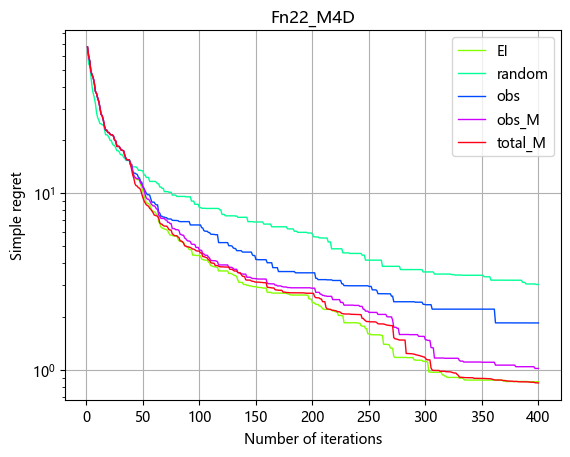

In [32]:
plot = plot_SimpleRegret(result_list=resultList,
                         n_calls = n_calls,
                        true_minimum=true_minimum-1e-6, 
                        yscale='log',
                        title="Fn"+str(title)+'_'+scale+str(dim)+'D')

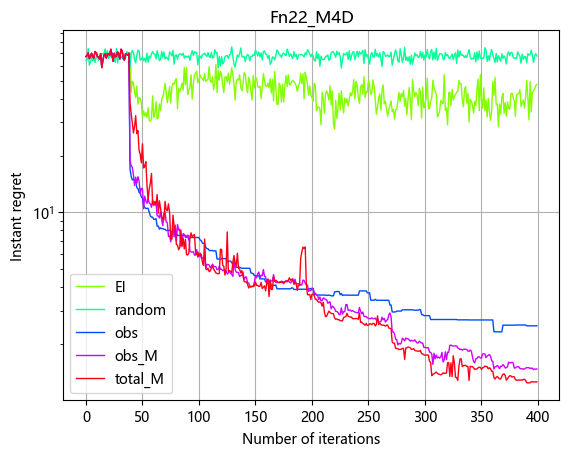

In [33]:
plot = plot_InstantRegret(result_list=resultList,
                         n_calls = n_calls,
                        true_minimum=true_minimum-1e-6,
                        yscale='log',
                        title="Fn"+str(title)+'_'+scale+str(dim)+'D')

In [ ]:
DF = []
noi = []
obs = []
pre = []
sim = []
finalnoi = []
finalobs = []
finalpre = []
for i in range(8):
    count1 = 1
    count2 = 1
    count3 = 1
    count4 = 1
    noimin = 100000000
    obsmin = 100000000
    premin = 100000000
    simmin = 100000000
    noinum = 0
    obsnum = 0
    prenum = 0
    simnum = 0
    with open("Data\\noise2D\\Fn"+str(i+1)+'M_noi.csv') as file:
        for line in file:
            data = [float(x) for x in line.strip().split(",")]
            if f[i](data)<noimin:
                noimin = f[i](data)
                noinum = count1%n_calls
                if count1%n_calls==0:
                    noinum = n_calls
            if count1%n_calls==0:
                finalnoi.append(f[i](data))
                noi.append([noinum,noimin])
                noimin = 100000000
            count1 = count1+1
    with open("Data\\noise2D\\Fn"+str(i+1)+'M_obs.csv') as file:
        for line in file:
            data = [float(x) for x in line.strip().split(",")]
            if f[i](data)<obsmin:
                obsmin = f[i](data)
                obsnum = count2%n_calls
                if count2%n_calls==0:
                    obsnum = n_calls
            if count2%n_calls==0:
                finalobs.append(f[i](data))
                obs.append([obsnum,obsmin])
                obsmin = 100000000
            count2 = count2+1
    with open("Data\\noise2D\\Fn"+str(i+1)+'M_pre.csv') as file:
        for line in file:
            data = [float(x) for x in line.strip().split(",")]
            if f[i](data)<premin:
                premin = f[i](data)
                prenum = count3%n_calls
                if count3%n_calls==0:
                    prenum = n_calls
            if count3%n_calls==0:
                finalpre.append(f[i](data))
                pre.append([prenum,premin])
                premin = 100000000
            count3 = count3+1
    with open("Data\\noise2D\\Fn"+str(i+1)+'M.csv') as file:
        for line in file:
            data = [float(x) for x in line.strip().split(",")]
            if f[i](data)<simmin:
                simmin = f[i](data)
                simnum = count4%n_calls
                if count4%n_calls==0:
                    simnum = n_calls
            if count4%n_calls==0:
                sim.append([simnum,simmin])
                simmin = 100000000
            count4 = count4+1
for i in range(len(noi)):
    m = mindata[i//n_repeats]
    p1 = (noi[i][1]-m)/abs(m)
    p2 = (obs[i][1]-m)/abs(m)
    p3 = (pre[i][1]-m)/abs(m)
    p4 = (finalnoi[i]-m)/abs(m)
    p5 = (finalobs[i]-m)/abs(m)
    p6 = (finalpre[i]-m)/abs(m)
    p0 = (sim[i][1]-m)/abs(m)
    DF.append([sim[i][0],noi[i][0],obs[i][0],pre[i][0],sim[i][1],noi[i][1],obs[i][1],pre[i][1],finalnoi[i],finalobs[i],finalpre[i],p0,p1,p2,p3,p4,p5,p6])

In [ ]:
with open("noiseAnalaysData.csv","w") as file:
    np.savetxt(file,DF,delimiter=',') 

In [ ]:
'''
import numpy as np
from pak.plotfunc import *
import cocoex

# 创建测试套件并获取问题实例
f = []
suite = cocoex.Suite("bbob", "year:2023", "dimensions: 2")
bounds = [(-5., 5.), ] * 2
for i in [0,7,6,9,13,17,18,21]:
    f.append(suite.get_problem(i*15))

n_repeats = 1
n_calls = 1000
n_init = 100

mindata = [79.48000000407798,149.15138957895294,92.94000000100081,-54.906942117849695,-52.34983987581371,-16.904964276282467,-102.54972180473906,-999.9999996132141]
'''